In [196]:
from PIL import Image
import numpy as np
import random
import matplotlib.pyplot as plt


In [521]:
N = 100
B = 0
mu = 0.33 # g mu
J = -0.2
k = 0.01 # Boltzmann
T = 30
state = np.zeros((N)) # spins up ( 1 ) , down ( 0 )
S = np.zeros((N),float)
U = np.zeros(4999)
#random.seed () # Seed generator
t = np.linspace(0,4999,4999)

def energy(S):
    FirstTerm = 0
    SecondTerm = 0 
    
    for i in range (0 , N-2): 
        FirstTerm += (-J)*S[i]* S[i + 1]
        
    for i in range (0 ,N-1):
        SecondTerm += S[i]
        SecondTerm *= -B*mu
    return ( FirstTerm + SecondTerm ) 




In [522]:
for b in range (0,N):
    state[b] = -1
    
ES = energy(state)
print(ES)

19.599999999999962


In [523]:
AVR = np.zeros(0)

for c in range (0,24994):
    test = np.array(state)
    r = int(N*random.random())
    test[r] *= -1
    ET = energy(test)
    
    p = np.exp ((ES-ET)/(k*T))
    if p >= random.random():
        
        state = np.array(test)
        ES = ET
    if c%5 == 0:
        U[int(c/5)] = ES
        
    if c > 20000:
    #    if abs(U[int(c/5)]-U[int(c/5 - 1)])<0.01 and abs(U[int(c/5)]-U[int(c/5 - 2)])<0.01 and abs(U[int(c/5)]-U[int(c/5 - 3)])<0.01:
        AVR = np.append(AVR,ES)
            #print (AVR)
            #print(c)
sum(AVR)/len(AVR)        
           

-10.94852793911476

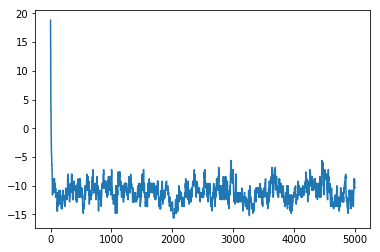

[-1. -1.  1. -1. -1.  1. -1.  1. -1. -1.  1.  1. -1. -1.  1. -1. -1. -1.
  1.  1. -1. -1.  1. -1.  1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1.
  1. -1.  1. -1.  1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1.
 -1. -1.  1. -1. -1.  1. -1.  1. -1. -1.  1. -1.  1. -1.  1.  1. -1.  1.
 -1. -1.  1. -1.  1. -1.  1. -1.  1. -1. -1.  1.  1.  1. -1. -1.  1. -1.
  1.  1. -1.  1. -1. -1.  1. -1.  1. -1.]


In [524]:
#print(U)
plt.plot(t,U)
plt.show()
print(state)